In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv("data\\20240215.csv")
# ハイフンをNaNに置き換え
df = df.replace('---', np.nan)

In [16]:

df["イベント"].value_counts()

イベント
バス停到着         19867
バス停発車         19160
送りボタン押下       14022
乗降開始           7078
乗降終了           6542
ドアクローズ(前)      5179
ドアオープン(前)      5107
ドアクローズ(中)      4406
ドアオープン(中)      4393
系統終了            876
自動歩進OFF         858
起動ON            747
通信OFFモード解除      747
系統選択            673
乗務員支援OFF        570
起動OFF           520
乗務員支援ON         288
戻しボタン押下         230
ルート外れ           157
ルート復帰           157
バス停飛ばし           55
バス停戻り             1
Name: count, dtype: int64

In [22]:
df = df[['経路コード', 'イベント発生時刻', 'イベント', '停留所名', '車両位置(緯度)', '車両位置(経度)', '遅延早発(秒)']].copy()
df = df[df['イベント'].isin(['バス停到着', 'バス停発車'])]
# イベント発生時刻を datetime 型に変換
df['イベント発生時刻'] = pd.to_datetime(df['イベント発生時刻'])
df = df.sort_values(by=['経路コード', 'イベント発生時刻']).reset_index(drop=True)
df

,経路コード,イベント発生時刻,イベント,停留所名,車両位置(緯度),車両位置(経度),遅延早発(秒)
0,001_030500,2024-02-15 19:26:25,バス停到着,いわき駅前,37.057680,140.893103,-515.0
1,001_030500,2024-02-15 19:35:07,バス停発車,いわき駅前,37.057766,140.892929,0.0
2,001_030500,2024-02-15 19:35:51,バス停到着,平南町,37.054989,140.892776,0.0
3,001_030500,2024-02-15 19:36:01,バス停発車,平南町,37.054321,140.892883,0.0
4,001_030500,2024-02-15 19:38:03,バス停到着,平中町,37.053436,140.890030,63.0
...,...,...,...,...,...,...,...
39022,001_070811,2024-02-15 18:11:37,バス停到着,祢宜町,37.056831,140.900024,-23.0
39023,001_070811,2024-02-15 18:11:50,バス停発車,祢宜町,37.056705,140.899216,-10.0
39024,001_070811,2024-02-15 18:12:31,バス停到着,平六町目,37.056999,140.897659,-29.0
39025,001_070811,2024-02-15 18:12:42,バス停発車,平六町目,37.057636,140.897369,-18.0


In [43]:
pd.set_option('display.max_rows', None)
df["経路名"].value_counts()


経路名
いわき駅→江名→イオンモール→泉駅                    2743
いわき駅→医療センター→湯本東口→玉川団地→イオンモール→小名浜     2153
泉駅→イオンモール→江名→いわき駅                    1784
いわき駅→御台境→高坂団地                        1774
ラパーク循環→飯野→高専前→いわき駅                   1721
小名浜→鹿島ショッピングセンター→いわき駅                1644
いわき駅→鹿島ショッピングセンター→小名浜                1619
高野→宮→医療センター→いわき駅                     1468
いわき駅→高専前→飯野→ラパーク循環                   1451
いわき駅→医療センター→宮→高野                     1422
菱川町→前原→高崎                            1394
高崎→前原→菱川町                            1392
いわき駅→鹿島→小名浜→イオンモール                   1334
小名浜→イオンモール→玉川団地→湯本東口→医療センター→いわき駅     1304
小名浜→玉川団地→湯本東口→医療センター→いわき駅            1286
いわき駅→高専前→飯野→中央台                      1282
泉駅→イオンモール→江名→平工                      1228
川平→医療センター→いわき駅                       1099
いわき駅→好間平坑                            1094
好間平坑→いわき駅                            1073
泉駅→江名→いわき駅                            954
中央台→飯野→高専前→いわき駅                       949
ラパーク循環→飯野→八ツ坂→いわき駅                    928
いわき駅→江名→泉駅                    

In [6]:
df["乗車人数"].isnull().sum()

91633

In [32]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# 欠損値の集計を表示
print(df["気象：天気"].isnull().sum())

71768


In [24]:
df_0215["気象：天気"].value_counts()

気象：天気
晴れ    13958
曇      5907
Name: count, dtype: int64

In [25]:
import pandas as pd

# 気象と遅延早発(秒)のデータをフィルタリング
weather_delay_data = df_0215[['気象：天気', '遅延早発(秒)']].dropna()

# 天気ごとの遅延早発(秒)の平均、中央値、標準偏差などを計算
weather_delay_stats = weather_delay_data.groupby('気象：天気')['遅延早発(秒)'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# 結果を表示
print(weather_delay_stats)


             mean  median         std      min     max  count
気象：天気                                                        
晴れ     178.882863   166.0  664.966093 -48582.0  5349.0  13958
曇      166.461994   129.0  693.808331  -5803.0  5178.0   5907


In [42]:
import pandas as pd
import folium

# CSVファイルの読み込み
df = df_0215

# 「車両位置(緯度)」と「車両位置(経度)」の値が-1でないものをフィルタリング
df = df[(df['車両位置(緯度)'] != -1) & (df['車両位置(経度)'] != -1)]

# 車両番号ごとにデータをグループ化
grouped = df.groupby('車両番号')

# データの範囲を計算
min_lat, max_lat = df['車両位置(緯度)'].min(), df['車両位置(緯度)'].max()
min_lon, max_lon = df['車両位置(経度)'].min(), df['車両位置(経度)'].max()

# 地図の中心を計算
center_lat = (min_lat + max_lat) / 2
center_lon = (min_lon + max_lon) / 2

# 地図の作成
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 車両番号ごとにプロット
for vehicle_number, group in grouped:
 # 散布図のプロット
 for _, row in group.iterrows():
  folium.CircleMarker(
   location=[row['車両位置(緯度)'], row['車両位置(経度)']],
   radius=5,
   color='blue',
   fill=True,
   fill_color='blue',
   fill_opacity=0.6,
   popup=f"車両番号: {vehicle_number}"
  ).add_to(m)
 # 折れ線のプロット
 folium.PolyLine(
  locations=[(row['車両位置(緯度)'], row['車両位置(経度)']) for _, row in group.iterrows()],
  color='blue',
  weight=2.5,
  opacity=0.6
 ).add_to(m) 

# 地図をエクスポート
m.save('map.html')

In [26]:
df_0215["イベント"].value_counts()

イベント
バス停到着         19867
バス停発車         19160
送りボタン押下       14022
乗降開始           7078
乗降終了           6542
ドアクローズ(前)      5179
ドアオープン(前)      5107
ドアクローズ(中)      4406
ドアオープン(中)      4393
系統終了            876
自動歩進OFF         858
起動ON            747
通信OFFモード解除      747
系統選択            673
乗務員支援OFF        570
起動OFF           520
乗務員支援ON         288
戻しボタン押下         230
ルート外れ           157
ルート復帰           157
バス停飛ばし           55
バス停戻り             1
Name: count, dtype: int64

In [25]:
door_events = df_0215[df_0215['イベント'].isin(['ドアクローズ(前)'])]


In [3]:
import pandas as pd

# 「バス停到着」と「バス停発車」のイベントをフィルタリング
df = df_0215[df_0215['イベント'].isin(['バス停到着', 'バス停発車'])]

# 必要なカラムを抽出（停留所名を追加）
df = df[['車両番号', 'イベント発生時刻', 'イベント', '停留所名','車両位置(緯度)', '車両位置(経度)']].copy()

# イベント発生時刻を datetime 型に変換
df['イベント発生時刻'] = pd.to_datetime(df['イベント発生時刻'])

# 車両番号ごとにデータをソート
df_sorted = df.sort_values(by=['車両番号', 'イベント発生時刻']).reset_index(drop=True)

# 発車から到着の時間差を計算するため、発車と到着のイベントをペアリング
def calculate_time_difference(group):
    time_diff_list = []
    last_arrival_time = None
    
    for i, row in group.iterrows():
        if row['イベント'] == 'バス停到着':
            last_arrival_time = row['イベント発生時刻']
            time_diff_list.append(None)  # 到着イベントの時間差はまだ計算しない
        elif row['イベント'] == 'バス停発車' and last_arrival_time is not None:
            # 到着イベントが発生した後の発車イベントに対して時間差を計算
            time_diff = (row['イベント発生時刻'] - last_arrival_time).total_seconds()
            time_diff_list.append(time_diff)
            last_arrival_time = None  # ペアリングが終わったのでリセット
        else:
            time_diff_list.append(None)

    group['到着から発車までの時間差(秒)'] = time_diff_list
    return group

# 車両番号ごとに時間差を計算
df_with_diff = df_sorted.groupby('車両番号').apply(calculate_time_difference)

# 結果を表示
df_with_diff[['イベント発生時刻', 'イベント', '停留所名', '車両位置(緯度)','車両位置(経度)','到着から発車までの時間差(秒)']]

# 車両番号をインデックスに設定
df_with_diff.set_index('車両番号', inplace=True)

# 結果を表示
df = df_with_diff[['イベント発生時刻', 'イベント', '停留所名','車両位置(緯度)', '車両位置(経度)', '到着から発車までの時間差(秒)']]
df


,イベント発生時刻,イベント,停留所名,車両位置(緯度),車両位置(経度),到着から発車までの時間差(秒)
車両番号,,,,,,
19,2024-02-15 06:59:05,バス停到着,赤井岳下,37.089160,140.841607,NaN
19,2024-02-15 07:10:19,バス停発車,赤井岳下,37.089142,140.841858,674.0
19,2024-02-15 07:11:12,バス停到着,常住,37.089798,140.847763,NaN
19,2024-02-15 07:11:19,バス停発車,常住,37.089443,140.848679,7.0
19,2024-02-15 07:11:50,バス停到着,赤井中入口,37.088100,140.852249,NaN
...,...,...,...,...,...,...
1596,2024-02-15 18:29:12,バス停到着,いわき公園,37.016731,140.924454,NaN
1596,2024-02-15 18:29:18,バス停発車,いわき公園,37.017025,140.923370,6.0
1596,2024-02-15 18:30:23,バス停到着,いわきコルム,37.015087,140.919220,NaN


In [4]:
df = df.dropna()
df

,イベント発生時刻,イベント,停留所名,車両位置(緯度),車両位置(経度),到着から発車までの時間差(秒)
車両番号,,,,,,
19,2024-02-15 07:10:19,バス停発車,赤井岳下,37.089142,140.841858,674.0
19,2024-02-15 07:11:19,バス停発車,常住,37.089443,140.848679,7.0
19,2024-02-15 07:12:19,バス停発車,赤井中入口,37.087914,140.853104,29.0
19,2024-02-15 07:13:19,バス停発車,新町,37.087582,140.855545,44.0
19,2024-02-15 07:17:37,バス停発車,赤井小入口,37.086376,140.863297,31.0
...,...,...,...,...,...,...
1596,2024-02-15 18:27:35,バス停発車,中央台東小,37.009533,140.927719,7.0
1596,2024-02-15 18:28:12,バス停発車,高久一丁目,37.012699,140.929779,7.0
1596,2024-02-15 18:28:48,バス停発車,光洋高校前,37.015461,140.928177,7.0


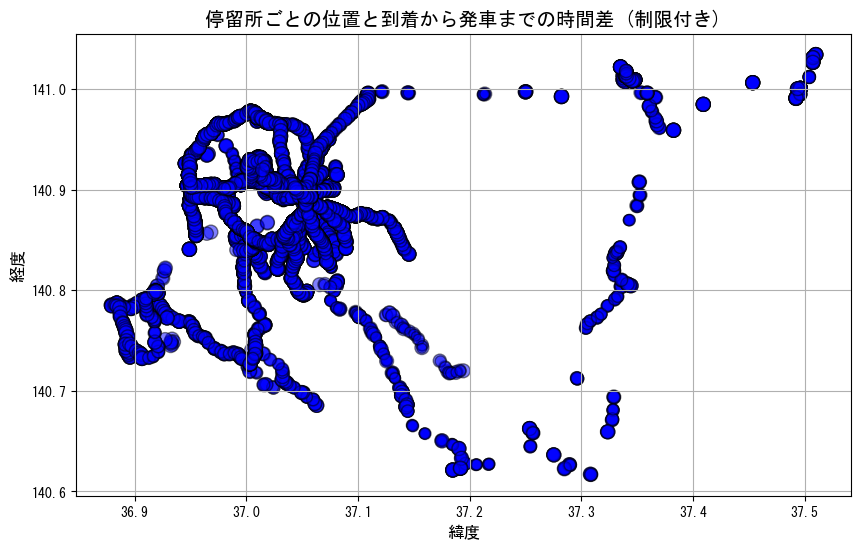

In [6]:
import matplotlib.pyplot as plt
df = df[(df['車両位置(緯度)'] != -1) & (df['車両位置(経度)'] != -1)]
# 経度と緯度をプロットして、到着から発車までの時間差によって円の大きさを変える
plt.figure(figsize=(10, 6))

# 経度、緯度、時間差を取得
longitude = df['車両位置(緯度)']
latitude = df['車両位置(経度)']
time_diff = df['到着から発車までの時間差(秒)']

# 時間差を円の大きさに変換し、サイズを最小10、最大100に制限
sizes = time_diff * 10
sizes = sizes.clip(lower=10, upper=100)

# 円の大きさに制限を設けてプロット
plt.scatter(longitude, latitude, s=sizes, c='blue', alpha=0.5, edgecolor='k')

# プロットのタイトルとラベルを設定
plt.title('停留所ごとの位置と到着から発車までの時間差 (制限付き)', fontsize=14)
plt.xlabel('緯度', fontsize=12)
plt.ylabel('経度', fontsize=12)

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()



In [4]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data\\20240215.csv")
# ハイフンをNaNに置き換え
df = df.replace('---', np.nan)
# フォント設定（日本語対応）
plt.rcParams['font.family'] = 'MS Gothic'

# 「バス停到着」と「バス停発車」のイベントをフィルタリング
df = df[df['イベント'].isin(['バス停到着', 'バス停発車'])]

# 必要なカラムを抽出（停留所名を追加）
df = df[['車両番号', 'イベント発生時刻', 'イベント', '停留所名','車両位置(緯度)', '車両位置(経度)']].copy()

# イベント発生時刻を datetime 型に変換
df['イベント発生時刻'] = pd.to_datetime(df['イベント発生時刻'])

# 車両番号ごとにデータをソート
df_sorted = df.sort_values(by=['車両番号', 'イベント発生時刻']).reset_index(drop=True)

df.dropna()

# 発車から到着の時間差を計算するため、発車と到着のイベントをペアリング
def calculate_time_difference(group):
    time_diff_list = []
    last_arrival_time = None
    
    for i, row in group.iterrows():
        if row['イベント'] == 'バス停到着':
            last_arrival_time = row['イベント発生時刻']
            time_diff_list.append(None)  # 到着イベントの時間差はまだ計算しない
        elif row['イベント'] == 'バス停発車' and last_arrival_time is not None:
            # 到着イベントが発生した後の発車イベントに対して時間差を計算
            time_diff = (row['イベント発生時刻'] - last_arrival_time).total_seconds()
            time_diff_list.append(time_diff)
            last_arrival_time = None  # ペアリングが終わったのでリセット
        else:
            time_diff_list.append(None)

    group['到着から発車までの時間差(秒)'] = time_diff_list
    return group

# 車両番号ごとに時間差を計算
df_with_diff = df_sorted.groupby('車両番号').apply(calculate_time_difference)

# 結果を表示
df_with_diff[['イベント発生時刻', 'イベント', '停留所名', '車両位置(緯度)','車両位置(経度)','到着から発車までの時間差(秒)']]

# 車両番号をインデックスに設定
df_with_diff.set_index('車両番号', inplace=True)

# 結果を表示
df = df_with_diff[['イベント発生時刻', 'イベント', '停留所名','車両位置(緯度)', '車両位置(経度)', '到着から発車までの時間差(秒)']]
# 緯度と経度が -1 でないデータをフィルタリング
df = df[(df['車両位置(緯度)'] != -1) & (df['車両位置(経度)'] != -1)]

# 経度と緯度をプロットして、到着から発車までの時間差によって円の大きさを変える
plt.figure(figsize=(10, 6))

# 車両番号をインデックスから取得し、車両番号ごとに異なる色を付けるために色を準備
unique_vehicles = df.index.unique()  # インデックスが車両番号になっている
colors = plt.cm.get_cmap('tab20', len(unique_vehicles))

# 各車両番号ごとの地図を作成して保存
for i, vehicle in enumerate(unique_vehicles):
    vehicle_data = df[df.index == vehicle]
    
    # データの範囲を計算
    min_lat, max_lat = vehicle_data['車両位置(緯度)'].min(), vehicle_data['車両位置(緯度)'].max()
    min_lon, max_lon = vehicle_data['車両位置(経度)'].min(), vehicle_data['車両位置(経度)'].max()

    # 中心座標を計算
    center_lat = (min_lat + max_lat) / 2
    center_lon = (min_lon + max_lon) / 2

    try:
        # Foliumマップ作成
        m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

        # マップに停留所のマーカーを追加
        for _, row in vehicle_data.iterrows():
            folium.CircleMarker(
                location=[row['車両位置(緯度)'], row['車両位置(経度)']],
                radius=row['到着から発車までの時間差(秒)'] * 0.1,  # 時間差に基づいた円の大きさ
                color=colors(i),
                fill=True,
                fill_color=colors(i),
                fill_opacity=0.6
            ).add_to(m)
        
        # 地図の保存
        file_name = f'map_{vehicle}.html'
        m.save(file_name)
        print(f'Saved map for vehicle number {vehicle} as {file_name}')
    except Exception as e:
        print(f"地図の保存中にエラーが発生しました: {e}")




C:\Users\ipteca32\AppData\Local\Temp\ipykernel_10828\3312372472.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_vehicles))


Saved map for vehicle number 19 as map_19.html
Saved map for vehicle number 43 as map_43.html
Saved map for vehicle number 44 as map_44.html
Saved map for vehicle number 46 as map_46.html
Saved map for vehicle number 47 as map_47.html
Saved map for vehicle number 224 as map_224.html
Saved map for vehicle number 247 as map_247.html
Saved map for vehicle number 297 as map_297.html
Saved map for vehicle number 324 as map_324.html
Saved map for vehicle number 325 as map_325.html
Saved map for vehicle number 331 as map_331.html
Saved map for vehicle number 344 as map_344.html
Saved map for vehicle number 345 as map_345.html
Saved map for vehicle number 361 as map_361.html
Saved map for vehicle number 370 as map_370.html
Saved map for vehicle number 413 as map_413.html
Saved map for vehicle number 421 as map_421.html
Saved map for vehicle number 423 as map_423.html
Saved map for vehicle number 426 as map_426.html
Saved map for vehicle number 462 as map_462.html
Saved map for vehicle number 5

<Figure size 1000x600 with 0 Axes>

In [5]:
df

,イベント発生時刻,イベント,停留所名,車両位置(緯度),車両位置(経度),到着から発車までの時間差(秒)
車両番号,,,,,,
19,2024-02-15 06:59:05,バス停到着,赤井岳下,37.089160,140.841607,NaN
19,2024-02-15 07:10:19,バス停発車,赤井岳下,37.089142,140.841858,674.0
19,2024-02-15 07:11:12,バス停到着,常住,37.089798,140.847763,NaN
19,2024-02-15 07:11:19,バス停発車,常住,37.089443,140.848679,7.0
19,2024-02-15 07:11:50,バス停到着,赤井中入口,37.088100,140.852249,NaN
...,...,...,...,...,...,...
1596,2024-02-15 18:29:12,バス停到着,いわき公園,37.016731,140.924454,NaN
1596,2024-02-15 18:29:18,バス停発車,いわき公園,37.017025,140.923370,6.0
1596,2024-02-15 18:30:23,バス停到着,いわきコルム,37.015087,140.919220,NaN


In [8]:
df = df.dropna()
df

,イベント発生時刻,イベント,停留所名,車両位置(緯度),車両位置(経度),到着から発車までの時間差(秒)
車両番号,,,,,,
19,2024-02-15 07:10:19,バス停発車,赤井岳下,37.089142,140.841858,674.0
19,2024-02-15 07:11:19,バス停発車,常住,37.089443,140.848679,7.0
19,2024-02-15 07:12:19,バス停発車,赤井中入口,37.087914,140.853104,29.0
19,2024-02-15 07:13:19,バス停発車,新町,37.087582,140.855545,44.0
19,2024-02-15 07:17:37,バス停発車,赤井小入口,37.086376,140.863297,31.0
...,...,...,...,...,...,...
1596,2024-02-15 18:27:35,バス停発車,中央台東小,37.009533,140.927719,7.0
1596,2024-02-15 18:28:12,バス停発車,高久一丁目,37.012699,140.929779,7.0
1596,2024-02-15 18:28:48,バス停発車,光洋高校前,37.015461,140.928177,7.0


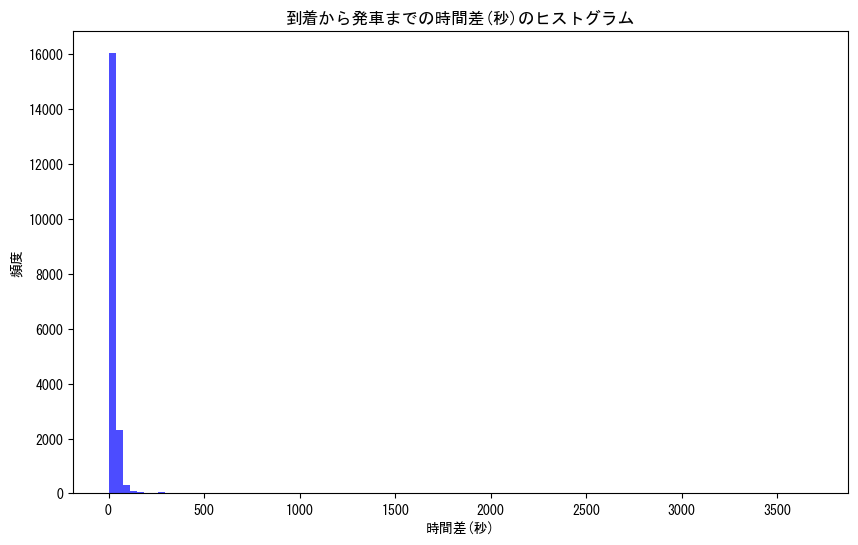

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# ヒストグラムを作成
plt.figure(figsize=(10, 6))
plt.hist(df['到着から発車までの時間差(秒)'], bins=100,color='blue', alpha=0.7)
plt.title('到着から発車までの時間差(秒)のヒストグラム')
plt.xlabel('時間差(秒)')
plt.ylabel('頻度')

# グラフを表示
plt.show()


C:\Users\ipteca32\AppData\Local\Temp\ipykernel_10828\82771558.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_vehicles))


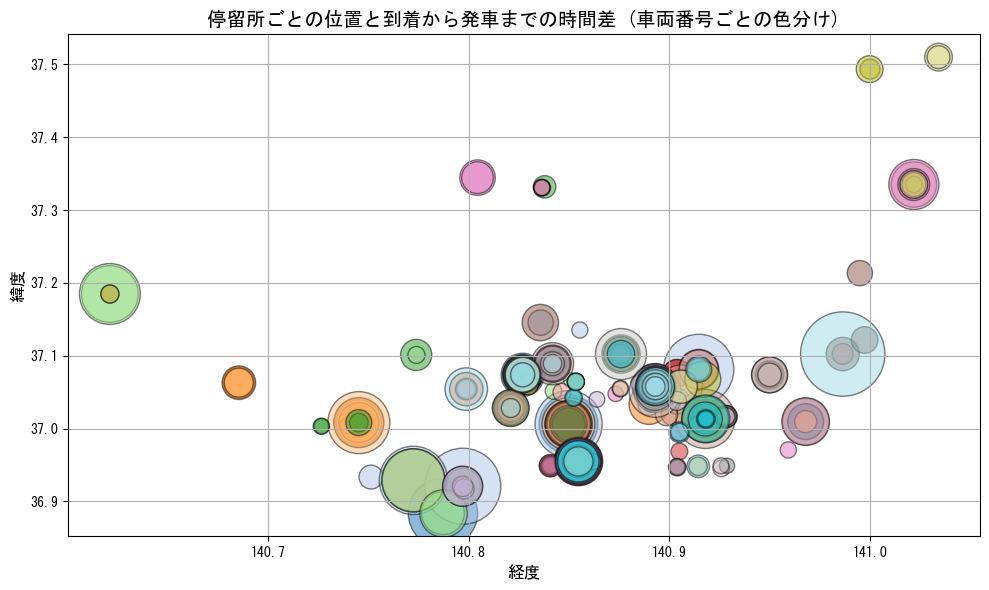

地図の保存中にエラーが発生しました: name 'vehicle_number' is not defined


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import folium
# 緯度と経度が -1 でないデータをフィルタリング
plt.rcParams['font.family'] = 'MS Gothic'
df = df[(df['車両位置(緯度)'] != -1) & (df['車両位置(経度)'] != -1)]

# 時間差が60秒未満のデータを削除
df = df[df['到着から発車までの時間差(秒)'] >= 120]

# 経度と緯度をプロットして、到着から発車までの時間差によって円の大きさを変える
plt.figure(figsize=(10, 6))

# 車両番号をインデックスから取得し、車両番号ごとに異なる色を付けるために色を準備
unique_vehicles = df.index.unique()  # インデックスが車両番号になっている
colors = plt.cm.get_cmap('tab20', len(unique_vehicles))

# 経度、緯度、時間差を取得
longitude = df['車両位置(経度)']
latitude = df['車両位置(緯度)']
time_diff = df['到着から発車までの時間差(秒)']

# 時間差を円の大きさに変換し、サイズを最小10、最大100に制限
sizes = time_diff 
sizes = sizes.clip(lower=1, upper=10)

# 車両番号ごとに色を変えてプロット
for i, vehicle in enumerate(unique_vehicles):
    vehicle_data = df[df.index == vehicle]  # インデックスを利用
    plt.scatter(vehicle_data['車両位置(経度)'], vehicle_data['車両位置(緯度)'], 
                s=vehicle_data['到着から発車までの時間差(秒)'] , 
      
                c=[colors(i)], alpha=0.5, edgecolor='k', label=f'車両番号 {vehicle}')
     # データの範囲を計算
    min_lat, max_lat = df['車両位置(緯度)'].min(), df['車両位置(緯度)'].max()
    min_lon, max_lon = df['車両位置(経度)'].min(), df['車両位置(経度)'].max()

     # データに基づいて中心座標を計算（NaNをチェック）
    center_lat = np.nan if pd.isna(min_lat) or pd.isna(max_lat) else (min_lat + max_lat) / 2
    center_lon = np.nan if pd.isna(min_lon) or pd.isna(max_lon) else (min_lon + max_lon) / 2
    
   # 中心座標がNaNの場合の処理
    if np.isnan(center_lat) or np.isnan(center_lon):
        print(f"車両番号 {vehicle_number} の中心座標計算でエラーが発生しました。")
        continue

    try:
        m = folium.Map(location=[center_lat, center_lon], zoom_start=12)
    except ValueError as e:
        print(f"地図の作成中にエラーが発生しました: {e}")
        continue
    # プロットのタイトルとラベルを設定
plt.title('停留所ごとの位置と到着から発車までの時間差 (車両番号ごとの色分け)', fontsize=14)
plt.xlabel('経度', fontsize=12)
plt.ylabel('緯度', fontsize=12)


# グリッドを表示
plt.grid(True)

# グラフを表示
plt.tight_layout()
plt.show()

#地図の保存
try:
    file_name = f'map_60秒以上停車.html'
    m.save(file_name)
    print(f'Saved map for vehicle number {vehicle_number} as {file_name}')
except Exception as e:
    print(f"地図の保存中にエラーが発生しました: {e}")


In [12]:
print(df.columns)

Index(['イベント発生時刻', '停留所名', '車両位置(緯度)', '遅延早発(秒)', '車両位置(経度)'], dtype='object')


In [47]:
import folium

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
 
# フォント設定（日本語対応）

plt.rcParams['font.family'] = 'MS Gothic'
 
# 経路コードごとのマップを保存する辞書を用意

vehicle_maps = {}
 
# 20240701.csv から 20240731.csv までの日付をループで処理

for day in range(1, 31):  # 1日から30日まで

    file_name = f'data\\202403{day:02d}.csv'  # 日付の部分をゼロ埋めで作成

    try:

        # CSVファイルの読み込み
        df = pd.read_csv(file_name)

        # ハイフンをNaNに置き換え
        df = df.replace('---', np.nan)
 
        # 「バス停到着」と「バス停発車」のイベントをフィルタリング
        df = df[df['イベント'].isin(['バス停到着', 'バス停発車'])]
 
        # 必要なカラムを抽出（停留所名を追加）
        df = df[['経路コード', 'イベント発生時刻', 'イベント', '停留所名', '車両位置(緯度)', '車両位置(経度)', '遅延早発(秒)']].copy()

        # イベント発生時刻を datetime 型に変換
        df['イベント発生時刻'] = pd.to_datetime(df['イベント発生時刻'])
        # 経路コードごとにデータをソート
        df_sorted = df.sort_values(by=['経路コード', 'イベント発生時刻']).reset_index(drop=True)
 
        df.dropna()
 
        # 経路コードをインデックスに設定
        df_sorted.set_index('経路コード', inplace=True)
 
        # 緯度と経度が -1 でないデータをフィルタリング
        df_filtered = df_sorted[(df_sorted['車両位置(緯度)'] != -1) & (df_sorted['車両位置(経度)'] != -1)]
 
        # 経路コードごとにループ
        unique_vehicles = df_filtered.index.unique()  # インデックスが経路コードになっている

        for vehicle in unique_vehicles:

            vehicle_data = df_filtered[df_filtered.index == vehicle]
            # マップがすでに存在するか確認

            if vehicle not in vehicle_maps:

                # 初めての車両の場合、中心座標を計算してマップを作成
                center_lat = vehicle_data['車両位置(緯度)'].mean()
                center_lon = vehicle_data['車両位置(経度)'].mean()
                vehicle_maps[vehicle] = folium.Map(location=[center_lat, center_lon], zoom_start=12)
 
            # 経路コードのマップにデータを追加
            m = vehicle_maps[vehicle]
 
            # 前のバス停の情報
            prev_busStop = None
            prev_lat = None
            prev_lon = None
            prev_delay = None
 
            for _, row in vehicle_data.iterrows():

                if row['イベント'] == 'バス停到着':
                    # 到着時の処理（線を引く）
                    delay_change = row['遅延早発(秒)'] - delay # 遅延の変化量を計算

                    if prev_busStop:

                        # 遅延早発の値を元に色と線の太さを決定
                        delay = row['遅延早発(秒)']

                        # 色の決定（遅延が大きければ赤、早発なら青）
                        if delay_change > 0:
                            color = 'red'
                        elif delay_change < 0:
                            color = 'blue'
                        else:
                            color = 'green'
 
                        # 線の太さを遅延の変化量に応じて設定
                        line_weight = max(3, min(delay_change*0.4, 40))  # 最小4、最大60
 
                        # 前のバス停と現在のバス停を線で結ぶ
                        folium.PolyLine(
                            locations=[(prev_lat, prev_lon), (row['車両位置(緯度)'], row['車両位置(経度)'])],
                            color=color,
                            weight=line_weight,  # 線の太さを遅延の差で表現
                            opacity=0.1,
                        ).add_to(m)
 
                    # 現在のバス停を前のバス停として保持

                    prev_busStop = row['停留所名']
                    prev_lat = row['車両位置(緯度)']
                    prev_lon = row['車両位置(経度)']
                    prev_delay = row['遅延早発(秒)']
 
                elif row['イベント'] == 'バス停発車'and delay>0:

                    # 発車時の処理（マーカーを追加）
                    folium.CircleMarker(
                        location=[row['車両位置(緯度)'], row['車両位置(経度)']],
                        radius=max(3, min(delay_change*0.4, 40)),
                        color='#3186cc',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.6,
                        popup=f"停留所: {row['停留所名']}, 遅延: {row['遅延早発(秒)']}秒"
                    ).add_to(m)
            break
 
    except FileNotFoundError:

        print(f'ファイル {file_name} が見つかりませんでした。')
 
# 経路コードごとに統合されたマップを保存

for vehicle, m in vehicle_maps.items():

    # 月情報（2024年6月）を含むファイル名に変更
    map_file_name = f'total_map_delay_diff_202403_{vehicle}.html'
    m.save(map_file_name)
    print(f'統合マップを保存しました: {map_file_name}')

 

C:\Users\ipteca32\AppData\Local\Temp\ipykernel_18568\3133258145.py:26: DtypeWarning: Columns (31,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_18568\3133258145.py:26: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_18568\3133258145.py:26: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_18568\3133258145.py:26: DtypeWarning: Columns (31,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_18568\3133258145.py:26: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df 

統合マップを保存しました: total_map_delay_diff_202403_001_030500.html
統合マップを保存しました: total_map_delay_diff_202403_001_031100.html
統合マップを保存しました: total_map_delay_diff_202403_001_030600.html


In [3]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# フォント設定（日本語対応）
plt.rcParams['font.family'] = 'MS Gothic'

# 経路コードごとのマップを保存する辞書を用意
vehicle_maps = {}

# 20240301.csv から 20240331.csv までの日付をループで処理
for day in range(1, 32):  # 1日から31日まで
    file_name = f'data\\202403{day:02d}.csv'  # 日付の部分をゼロ埋めで作成
    try:
        # CSVファイルの読み込み
        df = pd.read_csv(file_name)

        # ハイフンをNaNに置き換え
        df = df.replace('---', np.nan)

        # 「バス停到着」と「バス停発車」のイベントをフィルタリング
        df = df[df['イベント'].isin(['バス停到着', 'バス停発車'])]

        # 必要なカラムを抽出（停留所名を追加）
        df = df[['経路コード', 'イベント発生時刻', 'イベント', '停留所名', '車両位置(緯度)', '車両位置(経度)', '遅延早発(秒)']].copy()

        # イベント発生時刻を datetime 型に変換
        df['イベント発生時刻'] = pd.to_datetime(df['イベント発生時刻'])

        # 平日と休日を判定
        df['weekday'] = df['イベント発生時刻'].apply(lambda x: x.weekday())  # 0: 月曜日, 6: 日曜日
        df['is_weekend'] = df['weekday'].apply(lambda x: x >= 5)  # 土曜・日曜を休日として扱う

        # 経路コードごとにデータをソート
        df_sorted = df.sort_values(by=['経路コード', 'イベント発生時刻']).reset_index(drop=True)

        df.dropna()

        # 経路コードをインデックスに設定
        df_sorted.set_index('経路コード', inplace=True)

        # 緯度と経度が -1 でないデータをフィルタリング
        df_filtered = df_sorted[(df_sorted['車両位置(緯度)'] != -1) & (df_sorted['車両位置(経度)'] != -1)]

        # 経路コードごとにループ
        unique_vehicles = df_filtered.index.unique()  # インデックスが経路コードになっている

        for vehicle in unique_vehicles:
            vehicle_data = df_filtered[df_filtered.index == vehicle]

            # マップがすでに存在するか確認
            if vehicle not in vehicle_maps:
                # 初めての車両の場合、中心座標を計算してマップを作成
                center_lat = vehicle_data['車両位置(緯度)'].mean()
                center_lon = vehicle_data['車両位置(経度)'].mean()
                vehicle_maps[vehicle] = folium.Map(location=[center_lat, center_lon], zoom_start=12)

            # 経路コードのマップにデータを追加
            m = vehicle_maps[vehicle]

            # レイヤー作成
            weekday_layer = folium.FeatureGroup(name='平日', show=True)
            weekend_layer = folium.FeatureGroup(name='休日', show=False)

            # 前のバス停の情報
            prev_busStop = None
            prev_lat = None
            prev_lon = None
            prev_delay = None

            for _, row in vehicle_data.iterrows():
                if row['イベント'] == 'バス停到着':
                    # 到着時の処理（線を引く）
                    delay_change = row['遅延早発(秒)'] - (prev_delay if prev_delay is not None else 0)  # 遅延の変化量を計算

                    if prev_busStop:
                        # 遅延早発の値を元に色と線の太さを決定
                        delay = row['遅延早発(秒)']

                        # 色の決定（遅延が大きければ赤、早発なら青）
                        if delay_change > 0:
                            color = 'red'
                        elif delay_change < 0:
                            color = 'blue'
                        else:
                            color = 'green'

                        # 線の太さを遅延の変化量に応じて設定
                        line_weight = max(3, min(delay_change * 0.4, 40))  # 最小4、最大60

                        # 前のバス停と現在のバス停を線で結ぶ
                        line = folium.PolyLine(
                            locations=[(prev_lat, prev_lon), (row['車両位置(緯度)'], row['車両位置(経度)'])],
                            color=color,
                            weight=line_weight,  # 線の太さを遅延の差で表現
                            opacity=0.6,
                        )

                        # 平日か休日かでレイヤーを決定
                        if row['is_weekend']:
                            line.add_to(weekend_layer)
                        else:
                            line.add_to(weekday_layer)
                    
                    # 現在のバス停を前のバス停として保持
                    prev_busStop = row['停留所名']
                    prev_lat = row['車両位置(緯度)']
                    prev_lon = row['車両位置(経度)']
                    prev_delay = row['遅延早発(秒)']

                elif row['イベント'] == 'バス停発車' and prev_delay is not None:
                    # 発車時の処理（マーカーを追加）
                    marker = folium.CircleMarker(
                        location=[row['車両位置(緯度)'], row['車両位置(経度)']],
                        radius=max(3, min(delay_change * 0.4, 40)),
                        color='#3186cc',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.6,
                        popup=f"停留所: {row['停留所名']}, 遅延: {row['遅延早発(秒)']}秒"
                    )

                    # 平日か休日かでレイヤーを決定
                    if row['is_weekend']:
                        marker.add_to(weekend_layer)
                    else:
                        marker.add_to(weekday_layer)

            # 平日と休日のレイヤーを地図に追加
            weekday_layer.add_to(m)
            weekend_layer.add_to(m)

            # Layer Control を追加
            folium.LayerControl().add_to(m)
            break
    except FileNotFoundError:
        print(f'ファイル {file_name} が見つかりませんでした。')

# 経路コードごとに統合されたマップを保存
for vehicle, m in vehicle_maps.items():
    # 月情報（2024年3月）を含むファイル名に変更
    map_file_name = f'total_map_delay_diff_202403_{vehicle}.html'
    m.save(map_file_name)
    print(f'統合マップを保存しました: {map_file_name}')


C:\Users\ipteca32\AppData\Local\Temp\ipykernel_8116\52649411.py:18: DtypeWarning: Columns (31,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_8116\52649411.py:18: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_8116\52649411.py:18: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_8116\52649411.py:18: DtypeWarning: Columns (31,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_8116\52649411.py:18: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f

統合マップを保存しました: total_map_delay_diff_202403_001_030500.html
統合マップを保存しました: total_map_delay_diff_202403_001_031100.html
統合マップを保存しました: total_map_delay_diff_202403_001_030600.html


In [23]:
import folium
import pandas as pd
import numpy as np

# フォント設定（日本語対応）
plt.rcParams['font.family'] = 'MS Gothic'

def plot_vehicle_routes(df, layer_name, center_lat=None, center_lon=None):
    """
    指定されたデータフレーム(df)とレイヤー名(layer_name)に基づいて、
    経路コードごとの地図を作成し、平日と休日のレイヤーに追加する。
    
    Args:
        df (DataFrame): 経路データを含むデータフレーム。
        layer_name (str): レイヤーの名前 (平日や休日など)。
        center_lat (float): マップの中心の緯度。指定がない場合はデータから計算。
        center_lon (float): マップの中心の経度。指定がない場合はデータから計算。
        
    Returns:
        folium.Map: 作成されたマップオブジェクト。
    """
    vehicle_maps = {}

    # 経路コードごとにループ
    unique_vehicles = df.index.unique()  # インデックスが経路コードになっている

    for vehicle in unique_vehicles:
        vehicle_data = df[df.index == vehicle]

        # マップがすでに存在するか確認
        if vehicle not in vehicle_maps:
            # 中心座標が指定されていない場合、データから計算
            if center_lat is None or center_lon is None:
                center_lat = vehicle_data['車両位置(緯度)'].mean()
                center_lon = vehicle_data['車両位置(経度)'].mean()
            vehicle_maps[vehicle] = folium.Map(location=[center_lat, center_lon], zoom_start=12)

        # 経路コードのマップにデータを追加
        m = vehicle_maps[vehicle]

        # レイヤー作成
        layer = folium.FeatureGroup(name=layer_name, show=True if layer_name == '平日' else False)

        # 前のバス停の情報
        prev_busStop = None
        prev_lat = None
        prev_lon = None
        prev_delay = None

        for _, row in vehicle_data.iterrows():
            if row['イベント'] == 'バス停到着':
                # 到着時の処理（線を引く）
                delay_change = row['遅延早発(秒)'] - (prev_delay if prev_delay is not None else 0)  # 遅延の変化量を計算

                if prev_busStop:
                    # 遅延早発の値を元に色と線の太さを決定
                    delay = row['遅延早発(秒)']

                    # 色の決定（遅延が大きければ赤、早発なら青）
                    if delay_change > 0:
                        color = 'red'
                    elif delay_change < 0:
                        color = 'blue'
                    else:
                        color = 'green'

                    # 線の太さを遅延の変化量に応じて設定
                    line_weight = max(3, min(delay_change * 0.4, 40))  # 最小4、最大60

                    # 前のバス停と現在のバス停を線で結ぶ
                    folium.PolyLine(
                        locations=[(prev_lat, prev_lon), (row['車両位置(緯度)'], row['車両位置(経度)'])],
                        color=color,
                        weight=line_weight,  # 線の太さを遅延の差で表現
                        opacity=0.6,
                    ).add_to(layer)

                # 現在のバス停を前のバス停として保持
                prev_busStop = row['停留所名']
                prev_lat = row['車両位置(緯度)']
                prev_lon = row['車両位置(経度)']
                prev_delay = row['遅延早発(秒)']

            elif row['イベント'] == 'バス停発車' and prev_delay is not None:
                # 発車時の処理（マーカーを追加）
                marker = folium.CircleMarker(
                    location=[row['車両位置(緯度)'], row['車両位置(経度)']],
                    radius=max(3, min(delay_change * 0.4, 40)),
                    color='#3186cc',
                    fill=True,
                    fill_color='#3186cc',
                    fill_opacity=0.6,
                    popup=f"停留所: {row['停留所名']}, 遅延: {row['遅延早発(秒)']}秒"
                )

                # マーカーをレイヤーに追加
                marker.add_to(layer)

        # マップにレイヤーを追加
        layer.add_to(m)

        # Layer Control を追加
        folium.LayerControl().add_to(m)

    return m


In [20]:
file_name = 'data\\20240301.csv'  # 日付の部分をゼロ埋めで作成
        # CSVファイルの読み込み
df = pd.read_csv(file_name)

        # ハイフンをNaNに置き換え
df = df.replace('---', np.nan)

        # 「バス停到着」と「バス停発車」のイベントをフィルタリング
df = df[df['イベント'].isin(['バス停到着', 'バス停発車'])]

        # 必要なカラムを抽出（停留所名を追加）
df = df[['経路コード', 'イベント発生時刻', 'イベント', '停留所名', '車両位置(緯度)', '車両位置(経度)', '遅延早発(秒)']].copy()

        # イベント発生時刻を datetime 型に変換
df['イベント発生時刻'] = pd.to_datetime(df['イベント発生時刻'])

# 平日と休日を判定
df['weekday'] = df['イベント発生時刻'].apply(lambda x: x.weekday())  # 0: 月曜日, 6: 日曜日
df['is_weekend'] = df['weekday'].apply(lambda x: x >= 5)  # 土曜・日曜を休日として扱う

# 経路コードごとにデータをソート
df_sorted = df.sort_values(by=['経路コード', 'イベント発生時刻']).reset_index(drop=True)

df.dropna()

# 経路コードをインデックスに設定
df_sorted.set_index('経路コード', inplace=True)

center_lat = vehicle_data['車両位置(緯度)'].mean()
center_lon = vehicle_data['車両位置(経度)'].mean()

df_weekday = df_sorted[df_sorted["is_weekend"]==False]
df_weekend = df_sorted[df_sorted["is_weekend"]==True]    



plot_vehicle_routes(df,"全日")
plot_vehicle_routes(df_weekday,"平日")
plot_vehicle_routes(df_weekend,"休日")





# フォント設定（日本語対応）
plt.rcParams['font.family'] = 'MS Gothic'

def plot_vehicle_routes(df, layer_name, center_lat=None, center_lon=None):
    """
    指定されたデータフレーム(df)とレイヤー名(layer_name)に基づいて、
    経路コードごとの地図を作成し、平日と休日のレイヤーに追加する。
    
    Args:
        df (DataFrame): 経路データを含むデータフレーム。
        layer_name (str): レイヤーの名前 (平日や休日など)。
        center_lat (float): マップの中心の緯度。指定がない場合はデータから計算。
        center_lon (float): マップの中心の経度。指定がない場合はデータから計算。
        
    Returns:
        folium.Map: 作成されたマップオブジェクト。
    """
    vehicle_maps = {}

    # 経路コードごとにループ
    unique_vehicles = df.index.unique()  # インデックスが経路コードになっている

    for vehicle in unique_vehicles:
        vehicle_data = df[df.index == vehicle]

        # 経路コードのマップにデータを追加
        m = vehicle_maps[vehicle]

        # レイヤー作成
        layer = folium.FeatureGroup(name=layer_name, show=True if layer_name == '平日' else False)

        # 前のバス停の情報
        prev_busStop = None
        prev_lat = None
        prev_lon = None
        prev_delay = None

        for _, row in vehicle_data.iterrows():
            if row['イベント'] == 'バス停到着':
                # 到着時の処理（線を引く）
                delay_change = row['遅延早発(秒)'] - (prev_delay if prev_delay is not None else 0)  # 遅延の変化量を計算

                if prev_busStop:
                    # 遅延早発の値を元に色と線の太さを決定
                    delay = row['遅延早発(秒)']

                    # 色の決定（遅延が大きければ赤、早発なら青）
                    if delay_change > 0:
                        color = 'red'
                    elif delay_change < 0:
                        color = 'blue'
                    else:
                        color = 'green'

                    # 線の太さを遅延の変化量に応じて設定
                    line_weight = max(3, min(delay_change * 0.4, 40))  # 最小4、最大60

                    # 前のバス停と現在のバス停を線で結ぶ
                    folium.PolyLine(
                        locations=[(prev_lat, prev_lon), (row['車両位置(緯度)'], row['車両位置(経度)'])],
                        color=color,
                        weight=line_weight,  # 線の太さを遅延の差で表現
                        opacity=0.6,
                    ).add_to(layer)

                # 現在のバス停を前のバス停として保持
                prev_busStop = row['停留所名']
                prev_lat = row['車両位置(緯度)']
                prev_lon = row['車両位置(経度)']
                prev_delay = row['遅延早発(秒)']

            elif row['イベント'] == 'バス停発車' and prev_delay is not None:
                # 発車時の処理（マーカーを追加）
                marker = folium.CircleMarker(
                    location=[row['車両位置(緯度)'], row['車両位置(経度)']],
                    radius=max(3, min(delay_change * 0.4, 40)),
                    color='#3186cc',
                    fill=True,
                    fill_color='#3186cc',
                    fill_opacity=0.6,
                    popup=f"停留所: {row['停留所名']}, 遅延: {row['遅延早発(秒)']}秒"
                )

                # マーカーをレイヤーに追加
                marker.add_to(layer)

        # マップにレイヤーを追加
        layer.add_to(m)

        # Layer Control を追加
        folium.LayerControl().add_to(m)

    return m


C:\Users\ipteca32\AppData\Local\Temp\ipykernel_25184\3052370699.py:3: DtypeWarning: Columns (31,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


,イベント発生時刻,イベント,停留所名,車両位置(緯度),車両位置(経度),遅延早発(秒),weekday,is_weekend
経路コード,,,,,,,,
001_030500,2024-03-01 19:28:11,バス停到着,いわき駅前,37.057830,140.893152,-409.0,4,False
001_030500,2024-03-01 19:35:10,バス停発車,いわき駅前,37.057762,140.892929,0.0,4,False
001_030500,2024-03-01 19:36:02,バス停到着,平南町,37.054966,140.892792,0.0,4,False
001_030500,2024-03-01 19:36:14,バス停発車,平南町,37.054325,140.892883,0.0,4,False
001_030500,2024-03-01 19:38:12,バス停到着,平中町,37.053436,140.890076,72.0,4,False
...,...,...,...,...,...,...,...,...
001_070811,2024-03-01 18:13:15,バス停到着,祢宜町,37.056831,140.900024,75.0,4,False
001_070811,2024-03-01 18:13:27,バス停発車,祢宜町,37.056698,140.899139,87.0,4,False
001_070811,2024-03-01 18:14:11,バス停到着,平六町目,37.057003,140.897659,71.0,4,False


In [164]:
import pandas as pd

def calculate_delay_change(df):
    """
    遅延早発の変化量（delay_change）を計算し、与えられたデータフレーム(df)に
    新しい列 'delay_change' を追加する。
    
    """
    df = df.copy()
    # DataFrame内の '---' を NaN に置き換える
    df.replace('---', np.nan, inplace=True)
    # 「バス停到着」と「バス停発車」のイベントをフィルタリング
    df = df[df['イベント'].isin(['バス停到着', 'バス停発車',"バス停飛ばし"])]
    # イベント発生時刻を datetime 型に変換
    df['イベント発生時刻'] = pd.to_datetime(df['イベント発生時刻'])
    # 経路コードごとにデータをソート
    df = df.sort_values(by=['経路コード', 'イベント発生時刻']).reset_index(drop=True)
  
    prev_event = np.nan
    prev_delay = 0
    delay_change = 0
    prev_keiro_kode = np.nan
    keiro_code = df["経路コード"]
    prev_lat = np.nan
    prev_lon = np.nan
    df["delay_change"] = 0


  

    for i in range(1, len(df)):
        if pd.notna(df.loc[i, '通過数']):  # '通過数'がNaNでないかをチェック
            # 'in' が含まれているかを確認
            if ' in ' in df.loc[i, '通過数']:
                # '通過数'列を 'in' で分割し、エラーが発生したら表示
                try:
                    mae, usiro = df.loc[i, '通過数'].split(' in ', 1)
                except ValueError:
                    # 分割に失敗した場合のエラーを表示し、スキップ
                    print(f"Error occurred at row {i} with 通過数: {df.loc[i, '通過数']}")
                    continue  # エラーが発生した場合はこのループをスキップ

                # 前後の数字を比較し、同じ場合は 'delay_change' に 0 を設定
                if int(mae) == int(usiro):
                    df.loc[i, 'delay_change'] = 0

            else:
                # 'in' が存在しない場合の処理
                print(f"'in' not found at row {i} with 通過数: {df.loc[i, '通過数']}")
                continue  # スキップするか、別の処理を行う
            
            # 前後の数値が同じ場合の処理
            mae, usiro = df.loc[i, '通過数'].split(' in ', 1)
            if int(mae) == int(usiro):
                df.loc[i, 'delay_change'] = 0

            # バス停到着かつ前のイベントがバス停到着ではない場合
            elif (df.loc[i, 'イベント'] == 'バス停到着' or df.loc[i, 'イベント'] == 'バス停飛ばし') and prev_event != 'バス停到着':
                df.loc[i, 'delay_change'] = df.loc[i, '遅延早発(秒)'] - prev_delay
                # 前の座標を保存
                df.loc[i, 'prev_lat'] = prev_lat
                df.loc[i, 'prev_lon'] = prev_lon
            
            # バス停発車かつ前のイベントがバス停到着の場合
            elif df.loc[i, 'イベント'] == 'バス停発車' and prev_event == 'バス停到着':
                if prev_delay < 0:
                    df.loc[i, 'delay_change'] = 0
                else:
                    df.loc[i, 'delay_change'] = df.loc[i, '遅延早発(秒)'] - prev_delay
            
            # 経路コードが前回と異なる場合
            elif df.loc[i, '経路コード'] != prev_keiro_kode:
                df.loc[i, 'delay_change'] = 0

        # 現在のイベントと遅延値、経路コード、座標を保存
        prev_keiro_kode = df.loc[i, '経路コード']
        prev_event = df.loc[i, 'イベント']
        prev_delay = df.loc[i, '遅延早発(秒)']
        prev_lat = df.loc[i, '車両位置(緯度)']
        prev_lon = df.loc[i, '車両位置(経度)']


        # delay_change の値が -3600 から 3600 の範囲にあるデータを抽出
    if df.loc[i, 'delay_change']>=3600 or df.loc[i, 'delay_change']<=-3600:
        df.loc[i, 'delay_change'] = 0
    return df


In [165]:
import numpy as np
import pandas as pd

monthly_data = {}  # 月ごとのデータを格納する辞書

for month in range(6, 7):  # 2月から7月までのループ
    all_data = []  # 各月のデータをリセット
    for day in range(1, 32):  # 1日から31日まで
        try:
           
            file_name = f'data\\20240{month}{day:02d}.csv'  # 日付の部分をゼロ埋めで作成
            df = pd.read_csv(file_name)
            # 遅延変化量を計算して 'delay_change' 列を追加

            df = calculate_delay_change(df)
            all_data.append(df)  # データをリストに追加
        except FileNotFoundError:
            # ファイルが存在しない場合、処理をスキップ
            continue
        except pd.errors.EmptyDataError:
            # 空のファイルの場合もスキップ
            continue
    
    if all_data:  # データが存在する場合のみ結合
        # すべてのデータフレームを結合し、各月のデータを辞書に格納
        monthly_data[month] = pd.concat(all_data, ignore_index=True)
    else:
        print(f"No data available for month {month}")

# 3月のデータは monthly_data[3] でアクセス可能


C:\Users\ipteca32\AppData\Local\Temp\ipykernel_17240\3770199098.py:12: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_17240\3770199098.py:12: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


'in' not found at row 31455 with 通過数: [1]


C:\Users\ipteca32\AppData\Local\Temp\ipykernel_17240\3770199098.py:12: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_17240\3770199098.py:12: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_17240\3770199098.py:12: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_17240\3770199098.py:12: DtypeWarning: Columns (33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_17240\3770199098.py:12: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read

In [166]:
# 2月から7月までの monthly_data をそれぞれ保存する
for month in range(6, 7):  # 2月から7月
    file_name = f'monthly_data_{month:02d}.csv'  # ファイル名を 'monthly_data_02.csv' のように設定
    monthly_data[month].to_csv(file_name, index=False)  # CSVファイルとして保存


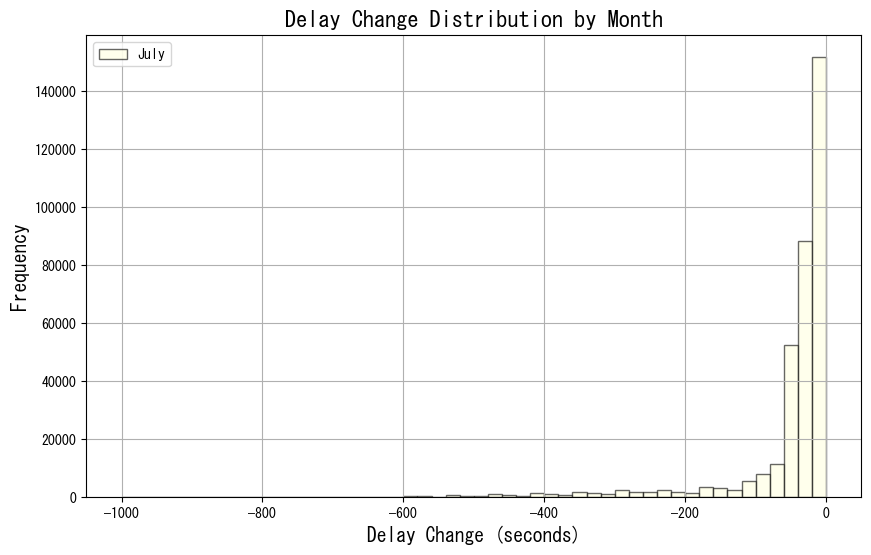

In [33]:
import matplotlib.pyplot as plt

# 各月のデータのヒストグラムを重ねて描画
plt.figure(figsize=(10, 6))

# 各月のヒストグラムを色を変えて表示
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow']
months = ['February', 'March', 'April', 'May', 'June', 'July']

for i, month in enumerate(range(2, 8)):  # 2月から7月まで
    if month in monthly_data:
        plt.hist(monthly_data[month]['delay_change'], bins=50, 
                 color=colors[i], edgecolor='black', alpha=0.6, label=months[i])

# グラフのタイトルとラベル設定
plt.title('Delay Change Distribution by Month', fontsize=16)
plt.xlabel('Delay Change (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドを表示
plt.grid(True)

# 凡例の追加
plt.legend()

# グラフの表示
plt.show()


In [17]:
monthly_data[7]

,経路コード,イベント発生時刻,イベント,停留所名,車両位置(緯度),車両位置(経度),遅延早発(秒),気象：天気,delay_change
0,001_031100,2024-07-01 07:20:22,バス停到着,いわき駅前,37.057558,140.893184,0.0,曇,0
1,001_031100,2024-07-01 07:20:23,バス停発車,いわき駅前,37.057880,140.893097,0.0,NaN,0
2,001_031100,2024-07-01 07:36:40,バス停到着,平南町,37.055023,140.892776,40.0,曇,40
3,001_031100,2024-07-01 07:37:26,バス停発車,平南町,37.054325,140.892883,86.0,NaN,46
4,001_031100,2024-07-01 07:40:05,バス停到着,平中町,37.053432,140.889999,185.0,曇,99
...,...,...,...,...,...,...,...,...,...
873782,001_070811,2024-07-31 18:12:26,バス停発車,祢宜町,37.056698,140.899170,0.0,NaN,0
873783,001_070811,2024-07-31 18:13:16,バス停到着,平六町目,37.057014,140.897659,0.0,晴れ,0
873784,001_070811,2024-07-31 18:13:29,バス停発車,平六町目,37.057648,140.897369,0.0,NaN,0
873785,001_070811,2024-07-31 18:14:41,バス停到着,いわき駅前,37.057606,140.892258,-319.0,晴れ,-319


In [18]:
monthly_data[7]["気象：天気"].value_counts()

気象：天気
曇     268485
晴れ    132714
雨      43494
雷電        52
Name: count, dtype: int64

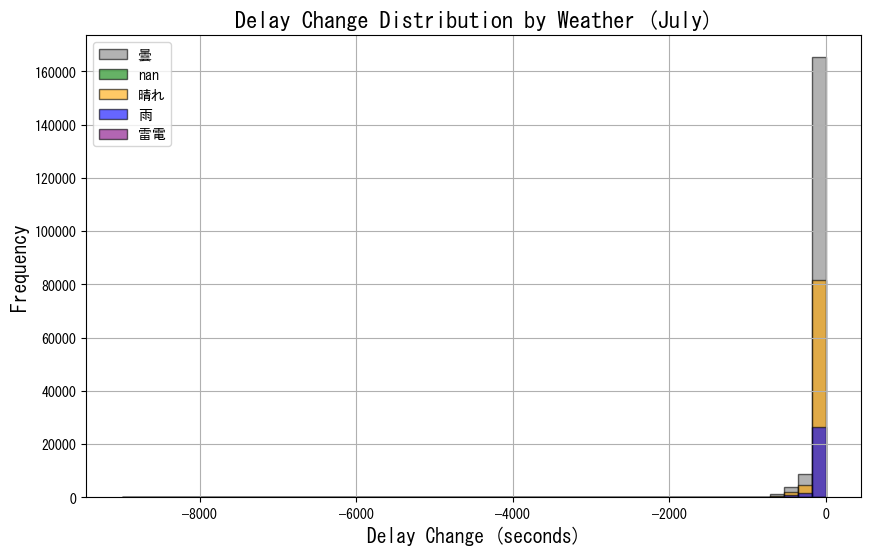

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'
# 天気ごとの色を定義
weather_colors = {
    '曇': 'gray',
    '晴れ': 'orange',
    '雨': 'blue',
    '雷電': 'purple'
}

# ユニークな天気の種類を取得
weather_types = monthly_data[7]['気象：天気'].unique()

plt.figure(figsize=(10, 6))

# 各天気ごとにヒストグラムを描画
for weather in weather_types:
    weather_data = monthly_data[7][monthly_data[7]['気象：天気'] == weather]
    plt.hist(weather_data['delay_change'], bins=50, 
             color=weather_colors.get(weather, 'green'),range=(-9000,0), edgecolor='black', alpha=0.6, label=weather)

# グラフのタイトルとラベルの設定
plt.title('Delay Change Distribution by Weather (July)', fontsize=16)
plt.xlabel('Delay Change (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドを表示
plt.grid(True)

# 凡例の追加
plt.legend()

# グラフを表示
plt.show()


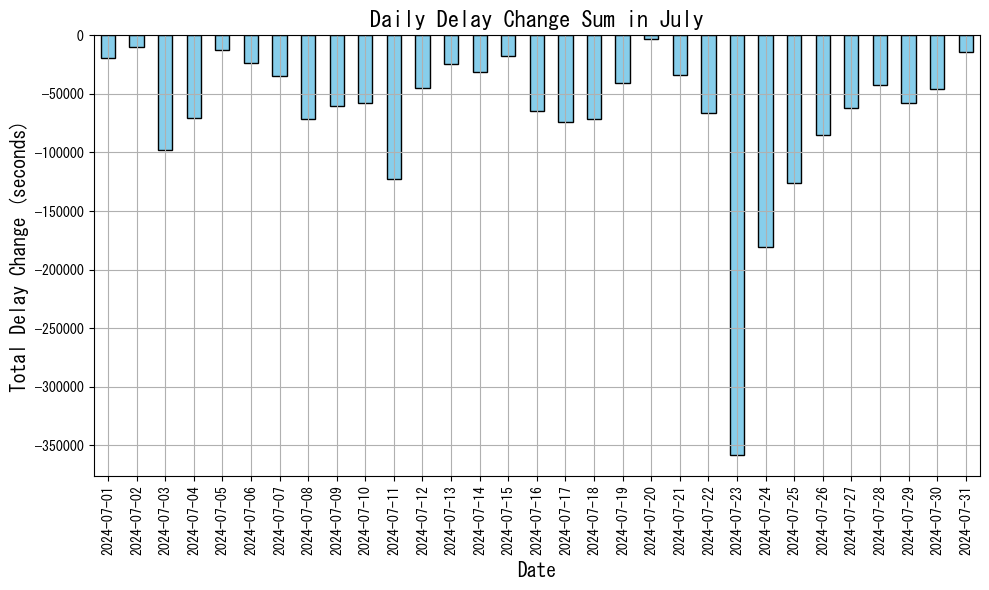

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 'イベント発生時刻' 列から日付（yyyy-mm-dd形式）を抽出
monthly_data[7]['date'] = pd.to_datetime(monthly_data[7]['イベント発生時刻']).dt.strftime('%Y-%m-%d')

# 日付ごとの delay_change の合計を計算
df_july_daily_sum = monthly_data[7].groupby('date')['delay_change'].sum()

# 日付ごとの delay_change の合計をグラフで表示
plt.figure(figsize=(10, 6))
df_july_daily_sum.plot(kind='bar', color='skyblue', edgecolor='black')

# グラフのタイトルとラベル設定
plt.title('Daily Delay Change Sum in July', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Delay Change (seconds)', fontsize=14)

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# 7月のデータを delay_change 列を基準に降順に並べ替え
df_july_sorted = monthly_data[7].sort_values(by='delay_change', ascending=False)
pd.set_option('display.max_rows', 1000)
df_july_sorted.head(1000)



In [ ]:
# 7月のデータを delay_change 列を基準に小さい順に並べ替え
df_july_sorted = monthly_data[7].sort_values(by='delay_change', ascending=True)

# 最大1000行表示
pd.set_option('display.max_rows', 1000)

# 最初の1000行を表示
df_july_sorted.head(1000)


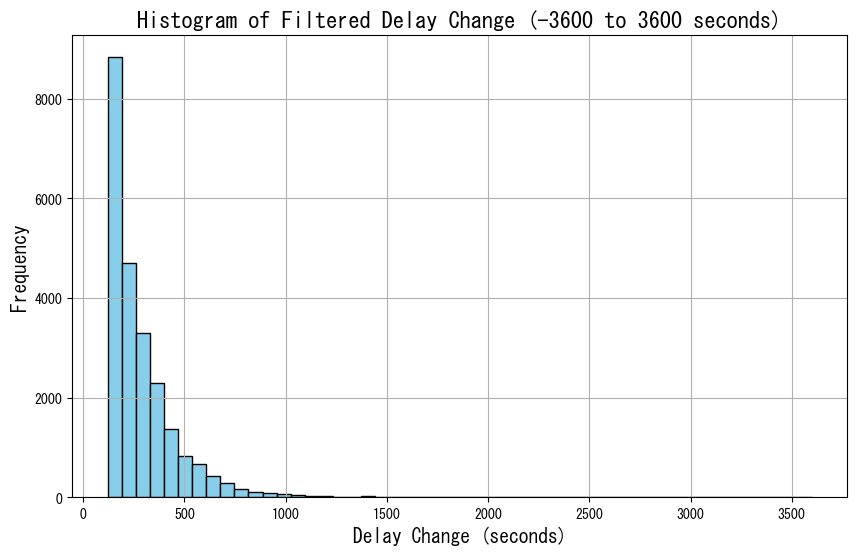

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# delay_change の値が -3600 から 3600 の範囲にあるデータを抽出
df_july_filtered = monthly_data[7][(monthly_data[7]['delay_change'] >= -3600) & (monthly_data[7]['delay_change'] <= 3600)]

# ヒストグラムの描画
plt.figure(figsize=(10, 6))
plt.hist(df_july_filtered['delay_change'], range=(120,3600),bins=50, color='skyblue', edgecolor='black')

# グラフのタイトルとラベル設定
plt.title('Histogram of Filtered Delay Change (-3600 to 3600 seconds)', fontsize=16)
plt.xlabel('Delay Change (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッド表示
plt.grid(True)

# グラフ表示
plt.show()


In [ ]:
# delay_change の値が -3600 から 3600 の範囲にあるデータを抽出
df_july_filtered = monthly_data[7][(monthly_data[7]['delay_change'] >= -3600) & (monthly_data[7]['delay_change'] <= 3600)]

# そのデータを小さい順に並べ替え
df_july_sorted_filtered = df_july_filtered.sort_values(by='delay_change', ascending=True)

# 最大1000行表示
pd.set_option('display.max_rows', 1000)

# 最初の1000行を表示
df_july_sorted_filtered.head(1000)


In [ ]:
# delay_change が 120 から 500 の間にあるデータを抽出
df_july_filtered = df_july_sorted[(df_july_sorted['delay_change'] >= 120) & (df_july_sorted['delay_change'] <= 500)]

# 1000行のデータを表示
pd.set_option('display.max_rows', 1000)
df_july_filtered.head(1000)


In [128]:
import pandas as pd
# 2月から7月までのデータを読み込み、monthly_data に格納
monthly_data = {}  # 空の辞書を作成して monthly_data に格納

for month in range(2, 8):  # 2月から7月まで
    file_name = f'monthly_data_{month:02d}.csv'  # 正しいファイルパスを指定
    monthly_data[month] = pd.read_csv(file_name)  # CSVファイルを読み込んで辞書に保存


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [4]:
monthly_data[2]["気象：天気"].value_counts()

気象：天気
晴れ     123947
曇       80025
雨       30708
みぞれ     13628
雪         609
Name: count, dtype: int64

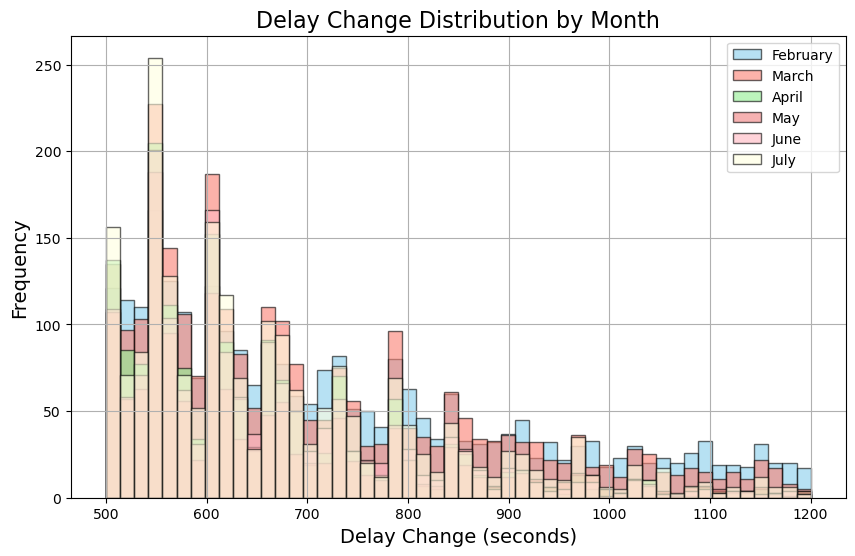

In [9]:
import matplotlib.pyplot as plt

# 各月のデータのヒストグラムを重ねて描画
plt.figure(figsize=(10, 6))

# 各月のヒストグラムを色を変えて表示
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow']
months = ['February', 'March', 'April', 'May', 'June', 'July']

for i, month in enumerate(range(2, 8)):  # 2月から7月まで
    if month in monthly_data:
        plt.hist(monthly_data[month]['delay_change'], range=(500,1200), bins=50, 
                 color=colors[i], edgecolor='black', alpha=0.6, label=months[i])

# グラフのタイトルとラベル設定
plt.title('Delay Change Distribution by Month', fontsize=16)
plt.xlabel('Delay Change (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドを表示
plt.grid(True)

# 凡例の追加
plt.legend()

# グラフの表示
plt.show()


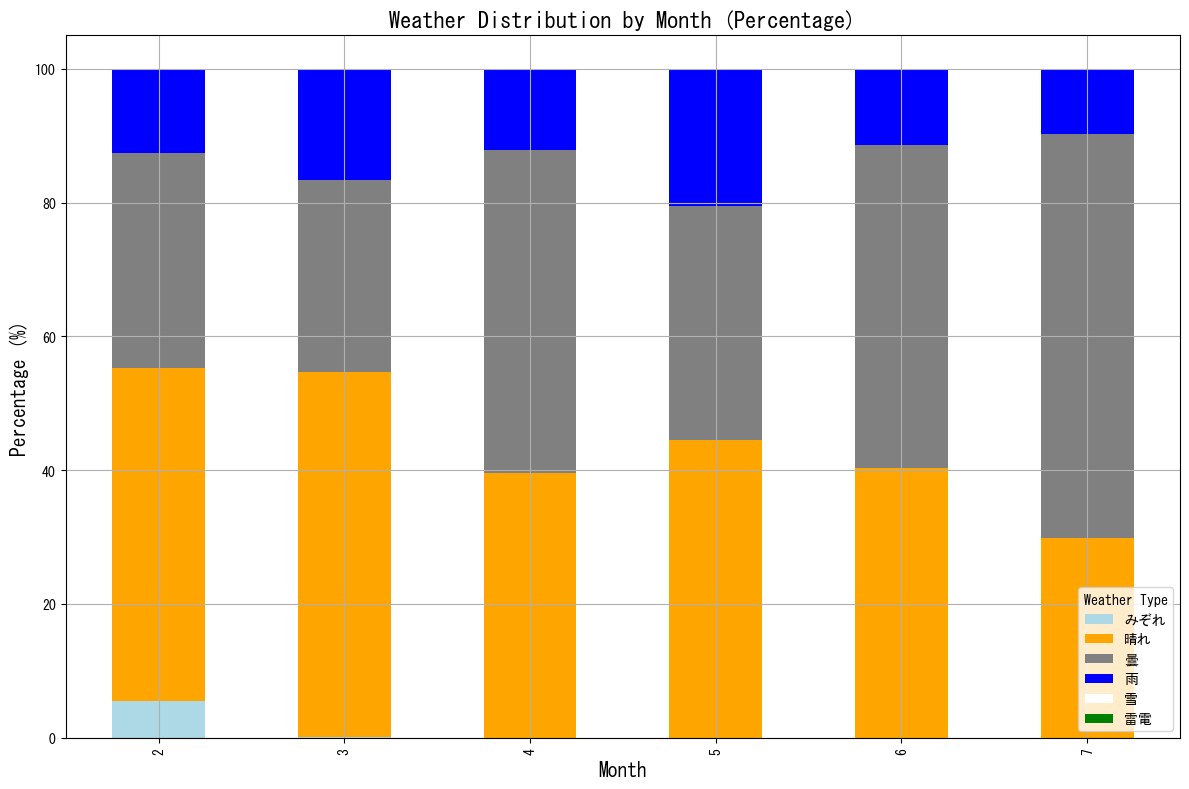

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 天気ごとの色を設定
weather_colors = {
    '晴れ': 'orange',
    '曇': 'gray',
    '雨': 'blue',
    'みぞれ': 'lightblue',
    '雪': 'white'
}

# 各月の天気の割合を保存するための辞書
monthly_weather_data = {}

# 2月から7月までの天気ごとの割合を計算
for month in range(2, 8):  # 2月から7月まで
    if month in monthly_data:
        # 天気ごとの出現回数をカウントし、それを全体の件数で割って割合を求める
        weather_counts = monthly_data[month]['気象：天気'].value_counts(normalize=True)
        monthly_weather_data[month] = (weather_counts * 100).round(2)  # パーセンテージに変換

# DataFrameに変換して月ごとのデータをまとめる
df_weather = pd.DataFrame(monthly_weather_data).T.fillna(0)  # NaNを0で置換しておく

# 積み上げ棒グラフの描画
df_weather.plot(kind='bar', stacked=True, color=[weather_colors.get(weather, 'green') for weather in df_weather.columns],
                figsize=(12, 8))

# グラフのタイトルとラベル設定
plt.title('Weather Distribution by Month (Percentage)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# 凡例を追加
plt.legend(title='Weather Type')

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.tight_layout()
plt.show()


In [123]:
import pandas as pd

# 2月から7月までの monthly_data の delay_change が 500 から 1500 のデータを抽出し、結合する
df_filtered_list = []

for month in range(2, 8):  # 2月から7月まで
    if month in monthly_data:  # 該当するデータが存在するか確認
        df_filtered = monthly_data[month][(monthly_data[month]['delay_change'] >= 500) and (monthly_data[month]['delay_change'] <= 700)]
        df_filtered_list.append(df_filtered)

# 全てのデータを結合
df_500_700 = pd.concat(df_filtered_list, ignore_index=True)

In [83]:
import jpholiday
import pandas as pd

# 休日（祝日、土曜日、日曜日）かどうかを判定する関数
def is_holiday_or_weekend(date):
    # 土日か祝日ならTrue
    return date.weekday() >= 5 or jpholiday.is_holiday(date)

# データフレームに「休日」列を追加
df = df_500_700

# 「イベント発生時刻」をdatetime型に変換
df["イベント発生時刻"] = pd.to_datetime(df["イベント発生時刻"])

# 休日かどうかを判定し、「休日」列を追加
df["休日"] = df["イベント発生時刻"].apply(is_holiday_or_weekend)

# 休日と平日に分割
df_weekend = df[df["休日"]]
df_weekday = df[df["休日"] == False]

# 時間でフィルタリング
df_weekend["時間"] = df_weekend["イベント発生時刻"].dt.hour
df_weekend = df_weekend[(df_weekend["時間"] > 11) & (df_weekend["時間"] < 14)]

df_weekday["時間"] = df_weekday["イベント発生時刻"].dt.hour
df_weekday = df_weekday[(df_weekday["時間"] > 11) & (df_weekday["時間"] < 14)]


C:\Users\ipteca32\AppData\Local\Temp\ipykernel_2736\761128030.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekend["時間"] = df_weekend["イベント発生時刻"].dt.hour
C:\Users\ipteca32\AppData\Local\Temp\ipykernel_2736\761128030.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekday["時間"] = df_weekday["イベント発生時刻"].dt.hour


In [20]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
# フォント設定（日本語対応）
plt.rcParams['font.family'] = 'MS Gothic'

def create_delay_change_map(df, file_name="delay_change_map.html"):
    """
    DataFrameに基づいて、全体の遅延変化（delay_change）に基づいて地図を作成する。

    Args:
        df (DataFrame): 遅延データを含むデータフレーム。以下の列が含まれている必要があります。
            - 'イベント': イベントの種類（バス停到着やバス停発車など）
            - '停留所名': 停留所の名前
            - '車両位置(緯度)': 車両の緯度
            - '車両位置(経度)': 車両の経度
            - 'delay_change': 遅延変化量

    Returns:
        folium.Map: 作成されたマップオブジェクト。
    """
    # 地図の中心を計算（データの平均緯度・経度）
    center_lat = df['車両位置(緯度)'].mean()
    center_lon = df['車両位置(経度)'].mean()
    
    # マップを作成
    m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

    delay_change_max = df["delay_change"].max()
    delay_change = np.nan

    for _, row in df.iterrows():
        if row['イベント'] == 'バス停到着' or row['イベント'] == 'バス停飛ばし':
            # 到着時の処理（線を引く）
            delay_change = row['delay_change']
            prev_lat  = row["prev_lat"]
            prev_lon  = row["prev_lon"]

            distance_km = geodesic((prev_lat, prev_lon), (row['車両位置(緯度)'], row['車両位置(経度)'])).kilometers

            # 直線距離が8kmを超えた場合はスキップ
            if distance_km > 8:
                continue
            
            # 遅延早発の値を元に色と線の太さを決定
            if delay_change > 0:
                color = 'red'
            elif delay_change < 0:
                color = 'blue'
            else:
                color = 'green'

            # 前のバス停と現在のバス停を線で結ぶ
            folium.PolyLine(
                locations=[(prev_lat, prev_lon), (row['車両位置(緯度)'], row['車両位置(経度)'])],
                color=color,
                weight=5,
                #max(3, min(60*(abs(delay_change)/delay_change_max), 60)),  # 線の太さを遅延の差で表現
                opacity=0.3,
            ).add_to(m)

        elif row['イベント'] == 'バス停発車'  :
            # 発車時の処理（マーカーを追加）
            marker = folium.CircleMarker(
                location=[row['車両位置(緯度)'], row['車両位置(経度)']],
                radius=max(1, min(20*(delay_change/delay_change_max), 20)),
                color='blue',
                fill=True,
                fill_color='blue',
                fill_opacity=0.3,
                popup=f"停留所: {row['停留所名']}, 遅延: {row['delay_change']}秒"
            )

            # マーカーをマップに追加
            marker.add_to(m)

        # 作成されたマップを指定されたファイル名で保存
    m.save(file_name)
    print(f"マップが {file_name} として保存されました。")

    return m


In [59]:
# "prev_lat"がNaNではない行を表示する
df_500_1500



,仕業コード,便コード,車両方位,遅延早発(秒),走行距離(m),EDSS発生日時,EDSS状態,イベント発生時刻,イベント記号,イベント,...,気象：全天日射量(MJ/㎡),気象：降雪(cm),気象：積雪(cm),気象：天気,気象：天気(変換後),気象：雲量,気象：視程(km),delay_change,prev_lat,prev_lon
0,00_00_100302,00_00_100302_005_1010,171,93.0,8,---,-1,2024-02-15 10:12:33,AR,バス停到着,...,NaN,NaN,NaN,晴れ,晴れ,NaN,20.0,514,37.057838,140.893234
1,00_00_100208,00_00_100208_013_1505,174,0.0,14,---,-1,2024-02-15 15:06:26,AR,バス停到着,...,NaN,NaN,NaN,曇,曇,NaN,20.0,622,37.057819,140.893234
2,00_00_100124,00_00_100124_013_1600,171,104.0,8,---,-1,2024-02-15 16:02:44,AR,バス停到着,...,NaN,NaN,NaN,曇,曇,NaN,20.0,631,37.057842,140.893234
3,00_00_100144,00_00_100144_012_1805,179,0.0,13,---,-1,2024-02-15 18:05:08,DP,バス停発車,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574,NaN,NaN
4,00_00_100304,00_00_100304_008_1826,341,376.0,0,---,-1,2024-02-15 18:32:16,DP,バス停発車,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12943,00_03_100144,00_03_100144_001_0646,335,545.0,0,---,-1,2024-07-31 07:26:05,AR,バス停到着,...,NaN,NaN,NaN,雨,雨,NaN,12.4,501,37.040615,140.892059
12944,00_03_100139,00_03_100139_007_1650,359,693.0,4,---,-1,2024-07-31 17:49:33,DP,バス停発車,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,693,NaN,NaN
12945,00_03_100111,00_03_100111_001_0630,283,421.0,8,---,-1,2024-07-31 07:39:01,AR,バス停到着,...,NaN,NaN,NaN,雨,雨,NaN,12.4,553,37.057796,140.893234
12946,00_03_100604,00_03_100604_001_0749,354,0.0,124,---,-1,2024-07-31 08:09:25,DP,バス停発車,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,634,NaN,NaN


In [84]:
m = create_delay_change_map(df_weekend,"weekend_6_7_11_14_2.html")

マップが weekend_6_7_11_14_2.html として保存されました。


In [10]:

m = create_delay_change_map(df_weekend,"weekend_3.html")

マップが weekend_3.html として保存されました。


In [89]:
df["気象：天気"].value_counts()

気象：天気
晴れ     327344
曇      322488
雨      105825
みぞれ      4781
雪         237
雷電         38
Name: count, dtype: int64

In [103]:
import matplotlib.font_manager as fm

# インストールされているフォントの一覧を表示
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(fm.FontProperties(fname=font).get_name())


Lucida Console
Adobe Gothic Std
Calibri
Corbel
SWSimp
Georgia
SimSun-ExtB
Century Gothic
Minion Pro
Wingdings 3
Segoe UI
Trebuchet MS
Garamond
Garamond
Book Antiqua
HGGothicM
Courier Std
SWLink
Microsoft Uighur
Adobe Hebrew
Segoe UI
Georgia
SWComp
Palatino Linotype
Myriad CAD
Bookshelf Symbol 7
MV Boli
Arial
Palatino Linotype
Garamond
MS Outlook
Bookman Old Style
Malgun Gothic
MS Mincho
SWGothe
Segoe Fluent Icons
Adobe Thai
Microsoft JhengHei
Segoe UI
Segoe UI
Courier New
Segoe UI
Microsoft Himalaya
Microsoft PhagsPa
Calibri
Comic Sans MS
Dubai
Adobe Myungjo Std
SWIsot1
SWGothg
HGSeikaishotaiPRO
Meiryo
Ebrima
BIZ UDGothic
Courier Std
Ink Free
Segoe Script
Symbol
Mongolian Baiti
Yu Gothic
SWAstro
Adobe Song Std
Dubai
SWMath
Yu Mincho
Palatino Linotype
Adobe Pi Std
French Script MT
Adobe Heiti Std
Candara
Franklin Gothic Medium
Segoe UI
SWIsop1
Adobe Ming Std
Corbel
Arial
Constantia
Nirmala UI
Microsoft Tai Le
Book Antiqua
Yu Mincho
Yu Gothic
Sitka
Myanmar Text
Constantia
Kozuka Mincho P

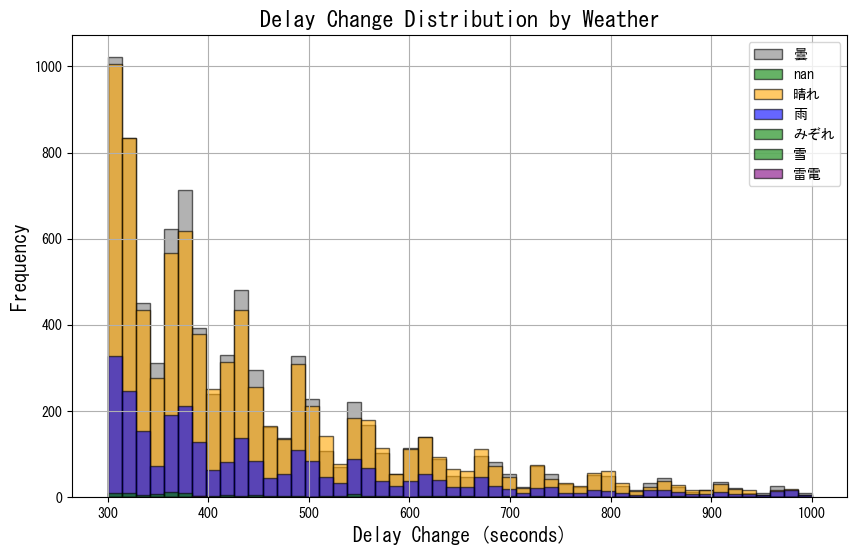

In [110]:
import matplotlib.pyplot as plt
import pandas as pd

# フォント設定
plt.rcParams['font.family'] = 'MS Gothic'

# 天気ごとの色を定義
weather_colors = {
    '曇': 'gray',
    '晴れ': 'orange',
    '雨': 'blue',
    '雷電': 'purple'
}

# ユニークな天気の種類を取得
weather_types = df['気象：天気'].unique()

plt.figure(figsize=(10, 6))

# 各天気ごとにヒストグラムを描画
for weather in weather_types:
    weather_data = df[df['気象：天気'] == weather]  # 修正: 正しいデータフィルタリング
    plt.hist(weather_data['delay_change'], bins=50, 
             color=weather_colors.get(weather, 'green'), range=(300, 1000), 
             edgecolor='black', alpha=0.6, label=weather)

# グラフのタイトルとラベルの設定
plt.title('Delay Change Distribution by Weather', fontsize=16)
plt.xlabel('Delay Change (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドを表示
plt.grid(True)

# 凡例の追加
plt.legend()

# グラフを表示
plt.show()


In [113]:
pd.set_option('display.max_columns', None)
df.head()

,仕業コード,便コード,車両方位,遅延早発(秒),走行距離(m),EDSS発生日時,EDSS状態,イベント発生時刻,イベント記号,イベント,車両位置(緯度),車両位置(経度),所属コード,所属名,通過数,乗車人数,経路コード,経路名,経路略称,イベント送信時刻,SOS発生日時,SOS状態,車速(km/h),標柱コード,停留所名,車両番号,車両機器IMEI,気象：第1観測地点,気象：第2観測地点,気象：気圧現地(hpa),気象：気圧海面(hpa),気象：降水量(mm),気象：気温(℃),気象：露点温度(℃),気象：蒸気圧(hPa),気象：湿度(％),気象：風速(m/s),気象：風向(m/s),気象：日照時間(h),気象：全天日射量(MJ/㎡),気象：降雪(cm),気象：積雪(cm),気象：天気,気象：天気(変換後),気象：雲量,気象：視程(km),delay_change,prev_lat,prev_lon
0,00_00_100144,00_00_100144_015_1935,268,63.0,39,NaN,-1,2024-02-15 19:38:03,AR,バス停到着,37.053436,140.890030,0,いわき中央,3 in 23,NaN,001_030500,いわき駅→川平,いわき川平線,2024-02-15 19:38:03,NaN,-1,27,130101,平中町,540,869223 04 142187 4,平,小名浜,1006.9,1007.5,0.0,15.9,12.1,14.1,78.0,5.5,南南西,NaN,NaN,NaN,NaN,曇,曇,NaN,20.0,63.0,37.054321,140.892883
1,00_00_100144,00_00_100144_015_1935,269,82.0,39,NaN,-1,2024-02-15 19:38:22,DP,バス停発車,37.053417,140.889145,0,いわき中央,3 in 23,NaN,001_030500,いわき駅→川平,いわき川平線,2024-02-15 19:38:22,NaN,-1,28,130201,平中町,540,869223 04 142187 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN
2,00_00_100144,00_00_100144_015_1935,268,106.0,39,NaN,-1,2024-02-15 19:38:46,AR,バス停到着,37.053368,140.886322,0,いわき中央,4 in 23,NaN,001_030500,いわき駅→川平,いわき川平線,2024-02-15 19:38:46,NaN,-1,36,130201,堂の前,540,869223 04 142187 4,平,小名浜,1006.9,1007.5,0.0,15.9,12.1,14.1,78.0,5.5,南南西,NaN,NaN,NaN,NaN,曇,曇,NaN,20.0,24.0,37.053417,140.889145
3,00_00_100144,00_00_100144_015_1935,269,127.0,13,NaN,-1,2024-02-15 19:39:07,DP,バス停発車,37.053356,140.885483,0,いわき中央,4 in 23,NaN,001_030500,いわき駅→川平,いわき川平線,2024-02-15 19:39:07,NaN,-1,33,130301,堂の前,540,869223 04 142187 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN
4,00_00_100144,00_00_100144_015_1935,270,93.0,10,NaN,-1,2024-02-15 19:39:33,DP,バス停発車,37.053204,140.882492,0,いわき中央,5 in 23,NaN,001_030500,いわき駅→川平,いわき川平線,2024-02-15 19:39:33,NaN,-1,36,130401,長橋町,540,869223 04 142187 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN


In [129]:
df.isnull().sum()

仕業コード                  80
便コード                   90
車両方位                    0
遅延早発(秒)                 0
走行距離(m)                 0
EDSS発生日時          2609557
EDSS状態                  0
イベント発生時刻                0
イベント記号                  0
イベント                    0
車両位置(緯度)                0
車両位置(経度)                0
所属コード                   0
所属名                     0
通過数                     0
乗車人数              2609557
経路コード                   0
経路名                     0
経路略称                    0
イベント送信時刻                0
SOS発生日時           2609557
SOS状態                   0
車速(km/h)                0
標柱コード                   0
停留所名                    0
車両番号                    0
車両機器IMEI                0
気象：第1観測地点         1847885
気象：第2観測地点         2119480
気象：気圧現地(hpa)      1847886
気象：気圧海面(hpa)      1847886
気象：降水量(mm)        1847886
気象：気温(℃)          1847886
気象：露点温度(℃)        1847886
気象：蒸気圧(hPa)       1847886
気象：湿度(％)          1847886
気象：風速(m/s)        1847886
気象：風向(m/s)        1847886
気象：日照時間(h)  

In [124]:
# データ全体のサイズと経路コードのユニークな値を確認
print(f"DataFrame shape: {df.shape}")
print(f"Unique route codes: {df['経路コード'].unique()}")


DataFrame shape: (2609557, 49)
Unique route codes: ['001_030500' '001_030600' '001_030601' '001_031100' '001_031161'
 '001_031500' '001_031501' '001_031700' '001_031701' '001_031800'
 '001_031900' '001_031901' '001_032250' '001_032251' '001_032500'
 '001_032501' '001_032600' '001_032601' '001_032800' '001_032801'
 '001_032900' '001_033000' '001_033100' '001_033200' '001_033300'
 '001_033301' '001_033800' '001_033801' '001_033900' '001_033901'
 '001_034000' '001_034110' '001_034111' '001_034210' '001_034350'
 '001_034351' '001_034500' '001_034501' '001_034600' '001_034601'
 '001_034850' '001_034851' '001_034900' '001_034901' '001_035031'
 '001_035100' '001_035200' '001_035501' '001_036010' '001_036011'
 '001_036110' '001_036200' '001_036201' '001_036400' '001_036401'
 '001_036501' '001_036600' '001_036810' '001_036900' '001_037130'
 '001_037200' '001_037201' '001_037300' '001_037301' '001_037401'
 '001_037500' '001_037501' '001_037630' '001_037661' '001_038000'
 '001_038001' '001_038100

In [132]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# データの前処理
df['イベント発生時刻'] = pd.to_datetime(df['イベント発生時刻'])

# 経路コードのユニークな値をリストとして取得
routes = df['経路コード'].unique()

# 経路ごとにデータを分ける
route_df = df[df['経路コード'] == routes[0]].copy()

# 時系列順にソート
route_df = route_df.sort_values(by='イベント発生時刻')

# 曜日、月、時間の特徴量を追加
route_df['day_of_week'] = route_df['イベント発生時刻'].dt.dayofweek  # 曜日
route_df['month'] = route_df['イベント発生時刻'].dt.month  # 月
route_df['hour'] = route_df['イベント発生時刻'].dt.hour  # 時間

# 特徴量の作成（delay_change、車両位置、月、時間、曜日）
X = route_df[['delay_change', '車両位置(緯度)', '車両位置(経度)', 'day_of_week', 'month', 'hour']]
X = X.dropna()  # 欠損値の削除
y = route_df['遅延早発(秒)']

# ダミー変数化（カテゴリ変数の処理が必要な場合）
X = pd.get_dummies(X)

# 時系列順で分割
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# トレーニングデータが空でないか確認
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
if X_train.shape[0] == 0 or y_train.shape[0] == 0:
    raise ValueError("Training data is empty after processing.")

# ランダムフォレストモデルの訓練（パラメータを調整）
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


KeyboardInterrupt: 

In [131]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (0, 4), y_train shape: (0,)
X_test shape: (0, 4), y_test shape: (0,)
